In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dask.dataframe as dd

In [2]:
df = dd.read_csv('/kaggle/input/classify-dataset-based-on-president-satria-data-sf/classify_president.csv')
df.head()

,created_at,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,lst_cnt,content,is_paslon_1,is_paslon_2,is_paslon_3
0,2024-01-04T09:57:09Z,rt,1248.0,266.0,107.0,9687.0,0.0,k-popers berencana kirim food truck untuk anie...,1,0,0
1,2024-01-04T09:57:09Z,rt,195.0,564.0,303.0,12461.0,2.0,bapak pendeta yusak ini dari magetan ke ponoro...,1,0,0
2,2024-01-04T09:57:10Z,rt,116.0,376.0,156.0,7488.0,1.0,"viral , gimana mak mak di jakarta tidak ter an...",1,0,0
3,2024-01-04T09:57:10Z,rt,2264.0,163.0,203.0,2065.0,0.0,"mendengar pak anies disini, rasanya saya sudah...",1,0,0
4,2024-01-04T09:57:11Z,rt,1157.0,1.0,1.0,798.0,0.0,media asing soroti cara anies gaet pemilih mud...,1,0,0


In [3]:
unidentified_df = dd.read_csv('/kaggle/input/classify-dataset-based-on-president-satria-data-sf/unidentified_president.csv')
unidentified_df.head()

,created_at,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,lst_cnt,content,is_paslon_1,is_paslon_2,is_paslon_3
0,2024-01-04T09:57:42Z,reply,0.0,103.0,33.0,1784.0,5.0,banjirr lah.. womg yg pasang bawa baliho 1 truk,0,0,0
1,2024-01-04T09:58:06Z,reply,0.0,236.0,2031.0,72251.0,7.0,ampe enek lihatnya,0,0,0
2,2024-01-04T09:58:22Z,rt,1172.0,431.0,271.0,9977.0,0.0,selamatkan bangsa ini dgn cara tidak memilih [...,0,0,0
3,2024-01-04T10:01:17Z,rt,1236.0,280.0,1644.0,4733.0,0.0,selamatkan bangsa ini dgn cara tidak memilih [...,0,0,0
4,2024-01-04T10:02:09Z,reply,0.0,508.0,280.0,13528.0,0.0,kenapa gak pake photo asli? apa malu?,0,0,0


In [4]:
# Inclusive

total_paslon_1 = df[df['is_paslon_1'] == 1].shape[0].compute()
total_paslon_2 = df[df['is_paslon_2'] == 1].shape[0].compute()
total_paslon_3 = df[df['is_paslon_3'] == 1].shape[0].compute()

total_paslon_1_2 = df[(df['is_paslon_1'] == 1) & (df['is_paslon_2'] == 1)].shape[0].compute()
total_paslon_1_3 = df[(df['is_paslon_1'] == 1) & (df['is_paslon_3'] == 1)].shape[0].compute()
total_paslon_2_3 = df[(df['is_paslon_2'] == 1) & (df['is_paslon_3'] == 1)].shape[0].compute()

total_paslon_1_2_3 = df[(df['is_paslon_1'] == 1) & (df['is_paslon_2'] == 1) & (df['is_paslon_3'] == 1)].shape[0].compute()
total_unidentified = unidentified_df.shape[0].compute()

In [5]:
# Print hasil perhitungan

print(f"Total Paslon 1: {total_paslon_1}")
print(f"Total Paslon 2: {total_paslon_2}")
print(f"Total Paslon 3: {total_paslon_3}")

print(f"Total Paslon 1 dan 2: {total_paslon_1_2}")
print(f"Total Paslon 1 dan 3: {total_paslon_1_3}")
print(f"Total Paslon 2 dan 3: {total_paslon_2_3}")

print(f"Total Paslon 1, 2, dan 3: {total_paslon_1_2_3}")
print(f"Unidentified : {total_unidentified}")

Total Paslon 1: 4797702
Total Paslon 2: 3284350
Total Paslon 3: 2888291
Total Paslon 1 dan 2: 817000
Total Paslon 1 dan 3: 512682
Total Paslon 2 dan 3: 479462
Total Paslon 1, 2, dan 3: 299844
Unidentified : 346892


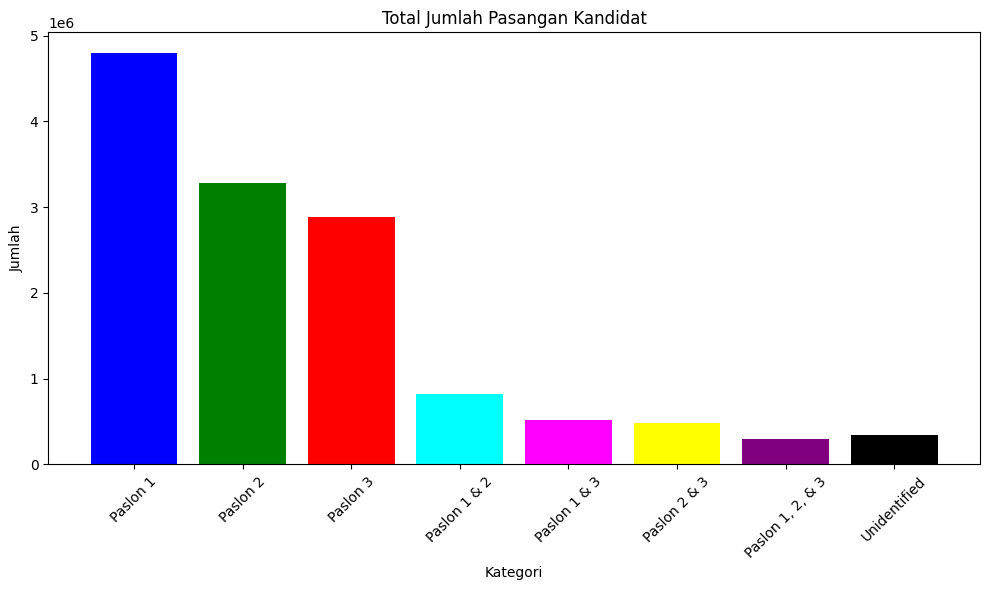

In [6]:
# Membuat plot menggunakan Matplotlib

labels = ['Paslon 1', 'Paslon 2', 'Paslon 3', 'Paslon 1 & 2', 'Paslon 1 & 3', 'Paslon 2 & 3', 'Paslon 1, 2, & 3','Unidentified']
values = [total_paslon_1, total_paslon_2, total_paslon_3, total_paslon_1_2, total_paslon_1_3, total_paslon_2_3, total_paslon_1_2_3,total_unidentified]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'purple','black'])

plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Total Jumlah Pasangan Kandidat')
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan plot
plt.show()

In [7]:
# Exclusive

total_paslon_1 = df[(df['is_paslon_1'] == 1) & (df['is_paslon_2'] == 0) & (df['is_paslon_3'] == 0)].shape[0].compute()
total_paslon_2 = df[(df['is_paslon_2'] == 1) & (df['is_paslon_1'] == 0) & (df['is_paslon_3'] == 0)].shape[0].compute()
total_paslon_3 = df[(df['is_paslon_3'] == 1) & (df['is_paslon_1'] == 0) & (df['is_paslon_2'] == 0)].shape[0].compute()

total_paslon_1_2 = df[(df['is_paslon_1'] == 1) & (df['is_paslon_2'] == 1) & (df['is_paslon_3'] == 0)].shape[0].compute()
total_paslon_1_3 = df[(df['is_paslon_1'] == 1) & (df['is_paslon_3'] == 1) & (df['is_paslon_2'] == 0)].shape[0].compute()
total_paslon_2_3 = df[(df['is_paslon_2'] == 1) & (df['is_paslon_3'] == 1) & (df['is_paslon_1'] == 0)].shape[0].compute()

total_paslon_1_2_3 = df[(df['is_paslon_1'] == 1) & (df['is_paslon_2'] == 1) & (df['is_paslon_3'] == 1)].shape[0].compute()
total_unidentified = unidentified_df.shape[0].compute()

In [8]:
# Print hasil perhitungan

print(f"Total Paslon 1: {total_paslon_1}")
print(f"Total Paslon 2: {total_paslon_2}")
print(f"Total Paslon 3: {total_paslon_3}")

print(f"Total Paslon 1 dan 2: {total_paslon_1_2}")
print(f"Total Paslon 1 dan 3: {total_paslon_1_3}")
print(f"Total Paslon 2 dan 3: {total_paslon_2_3}")

print(f"Total Paslon 1, 2, dan 3: {total_paslon_1_2_3}")
print(f"Unidentified : {total_unidentified}")

Total Paslon 1: 3767864
Total Paslon 2: 2287732
Total Paslon 3: 2195991
Total Paslon 1 dan 2: 517156
Total Paslon 1 dan 3: 212838
Total Paslon 2 dan 3: 179618
Total Paslon 1, 2, dan 3: 299844
Unidentified : 346892


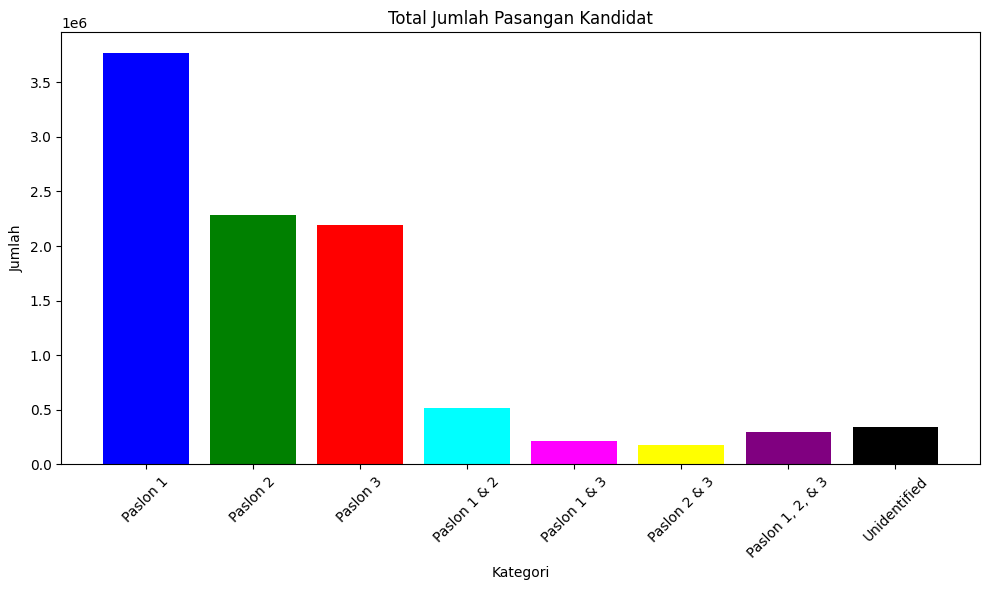

In [9]:
# Membuat plot menggunakan Matplotlib
labels = ['Paslon 1', 'Paslon 2', 'Paslon 3', 'Paslon 1 & 2', 'Paslon 1 & 3', 'Paslon 2 & 3', 'Paslon 1, 2, & 3','Unidentified']
values = [total_paslon_1, total_paslon_2, total_paslon_3, total_paslon_1_2, total_paslon_1_3, total_paslon_2_3, total_paslon_1_2_3,total_unidentified]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'purple','black'])

plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Total Jumlah Pasangan Kandidat')
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan plot
plt.show()

In [10]:
paslon_1_df = df[(df['is_paslon_1'] == 1) & (df['is_paslon_2'] == 0) & (df['is_paslon_3'] == 0)]
paslon_2_df = df[(df['is_paslon_2'] == 1) & (df['is_paslon_1'] == 0) & (df['is_paslon_3'] == 0)]
paslon_3_df = df[(df['is_paslon_3'] == 1) & (df['is_paslon_1'] == 0) & (df['is_paslon_2'] == 0)]

paslon_1_2_df = df[(df['is_paslon_1'] == 1) & (df['is_paslon_2'] == 1) & (df['is_paslon_3'] == 0)]
paslon_1_3_df = df[(df['is_paslon_1'] == 1) & (df['is_paslon_3'] == 1) & (df['is_paslon_2'] == 0)]
paslon_2_3_df = df[(df['is_paslon_2'] == 1) & (df['is_paslon_3'] == 1) & (df['is_paslon_1'] == 0)]

paslon_1_2_3_df = df[(df['is_paslon_1'] == 1) & (df['is_paslon_2'] == 1) & (df['is_paslon_3'] == 1)]

In [11]:
paslon_1_df.to_csv('classify_president_cat_1.csv', single_file=True, index=False)
paslon_2_df.to_csv('classify_president_cat_2.csv', single_file=True, index=False)
paslon_3_df.to_csv('classify_president_cat_3.csv', single_file=True, index=False)
paslon_1_2_df.to_csv('classify_president_cat_4.csv', single_file=True, index=False)
paslon_1_3_df.to_csv('classify_president_cat_5.csv', single_file=True, index=False)
paslon_2_3_df.to_csv('classify_president_cat_6.csv', single_file=True, index=False)
paslon_1_2_3_df.to_csv('classify_president_cat_7.csv', single_file=True, index=False)

['/kaggle/working/classify_president_cat_7.csv']